In [78]:
import scipy.io
import numpy as np
# Load the .mat file
mat = scipy.io.loadmat('../../../Downloads/AVI_SSVEP_Dataset_MAT/multi/Sub4_1_multitarget.mat')

In [79]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Aug 11 10:58:34 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Data': array([[(array([[512]], dtype=uint16), array(['1.7 cm'], dtype='<U6'), array(['60 cm'], dtype='<U5'), array(['LCD Monitor, Benq XL2420T'], dtype='<U25'), array(['Oz'], dtype='<U2'), array(['F'], dtype='<U1'), array(['27'], dtype='<U2'), array([[-1.16376887e-05, -9.93694994e-06,  1.01033957e-05, ...,
                 -1.03652701e-06, -3.39379881e-06, -1.91461368e-06],
                [-9.92672631e-06, -1.04809678e-05,  1.09620469e-05, ...,
                 -5.85182249e-07, -2.66101370e-06, -1.96472456e-06],
                [-8.17840009e-06, -1.05038544e-05,  1.14273589e-05, ...,
                 -8.46560582e-08, -1.98447356e-06, -1.89842456e-06],
                ...,
                [ 1.08353952e-05,  8.21798949e-06,  2.85765879e-07, ...,
                  3.73091711e-06,  2.33407218e-06, -8.49981006e-06],
                [ 1.06302332e-05,  

In [62]:
data = np.mean(mat['Data'][0][0][-6],1)

In [63]:
data.shape

(8192,)

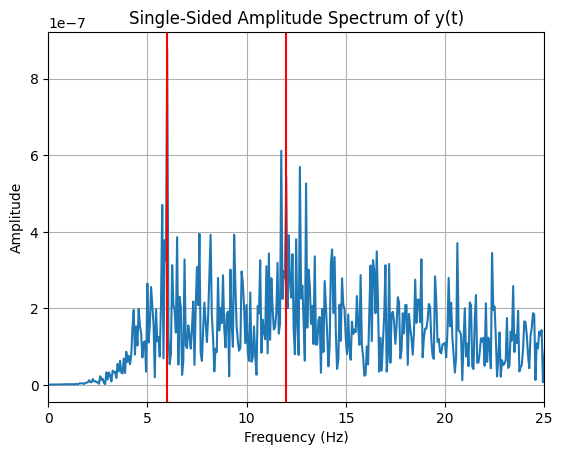

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
fs = 512  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
y = data  # Example signal (50 Hz sine wave)

# Length of the signal
L = len(y)

# Compute the next power of 2 from the length of y
NFFT = 2**np.ceil(np.log2(L)).astype(int)

# Perform the FFT
Y = np.fft.fft(y, NFFT) / L

# Frequency vector
f = fs / 2 * np.linspace(0, 1, NFFT//2 + 1)

# Compute the magnitude of the FFT
y_y = 2 * np.abs(Y[:NFFT//2 + 1])

# Plot the single-sided amplitude spectrum
plt.plot(f, y_y)
plt.xlim([0, 25])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Single-Sided Amplitude Spectrum of y(t)')
plt.grid(True)
plt.axvline(x=6, color='r')

plt.axvline(x=12, color='r')
plt.show()

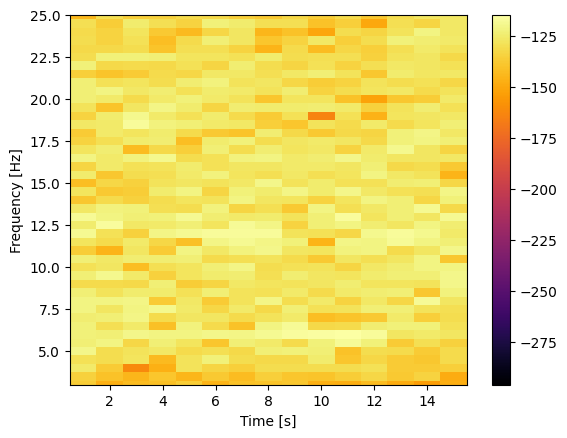

In [66]:
######### Plot time freq #############
from scipy.signal import spectrogram
import numpy as np
fig, ax = plt.subplots()
NFFT = fs
# Pxx, freqs, bins, im = plot.specgram(F8_T8_data, NFFT=NFFT, Fs = sampling_rate, 
#                                     cmap='seismic', noverlap=NFFT/2, vmin = -10, vmax = -10)
f, t, Sxx = spectrogram(data, fs = fs, nperseg= 1024, noverlap=512)
plt.ylim([3, 25])             # ... set the frequency range,
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='inferno')   # Plot the result
plt.xlabel('Time [s]')        # ... and label the axes
plt.ylabel('Frequency [Hz]')
plt.colorbar()                # ... with a color bar,
# plt.clim([0, -20])
plt.show()


In [67]:
import scipy.stats as stats
EEG_zscore = np.zeros((Sxx.shape[0], Sxx.shape[1]))
for i in range(Sxx.shape[0]):
    EEG_zscore[i] = stats.zscore(Sxx[i][:])
print(f'Z-Score Pxx shape is {np.max(EEG_zscore)}')
EEG_zscore = EEG_zscore - np.mean(EEG_zscore)

Z-Score Pxx shape is 3.640920767122413


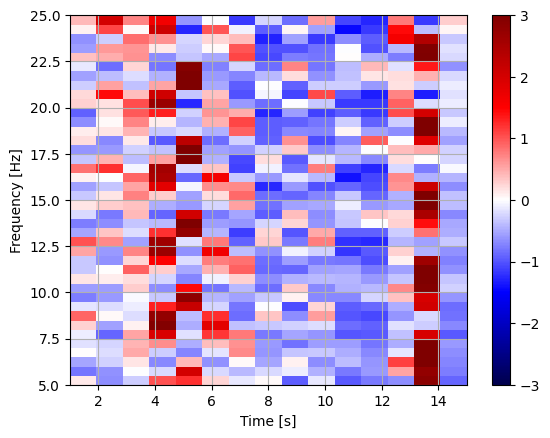

In [68]:
plt.imshow(EEG_zscore, aspect='auto', cmap='seismic', extent=[t.min(), t.max(), f.min(), f.max()])
plt.ylim([5, 25])             # ... set the frequency range,
plt.xlabel('Time [s]')        # ... and label the axes
plt.ylabel('Frequency [Hz]')
plt.grid()
plt.colorbar()                # ... with a color bar,
plt.clim([-3, 3])
plt.show()

In [39]:
mat['Data'][0][0][12]

array([[ 6. ],
       [ 6.5],
       [ 7. ],
       [ 7.5],
       [ 8.2],
       [ 9.3],
       [10. ]])

In [8]:
signal = mat.Data.EEG[:,1]

AttributeError: 'dict' object has no attribute 'Data'

In [9]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Aug 11 10:45:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Data': array([[(array([[512]], dtype=uint16), array(['1.7 cm'], dtype='<U6'), array(['60 cm'], dtype='<U5'), array(['LCD Monitor, Benq XL2420T'], dtype='<U25'), array(['Oz'], dtype='<U2'), array(['M'], dtype='<U1'), array(['32'], dtype='<U2'), array([[-6.55821486e-06,  2.02435422e-06,  3.60955300e-06, ...,
                  9.77182390e-06,  2.94987808e-06,  7.19556374e-06],
                [-7.67127040e-06,  3.84894838e-06,  3.02459762e-06, ...,
                  8.91291347e-06,  2.72920624e-06,  6.08689743e-06],
                [-8.41318433e-06,  5.60030276e-06,  2.34113077e-06, ...,
                  7.83712949e-06,  2.55764598e-06,  4.63828337e-06],
                ...,
                [-1.94204645e-07, -1.15135881e-05, -1.07450569e-06, ...,
                 -7.25714335e-06, -2.09652490e-06,  5.35900817e-08],
                [ 5.19160778e-07, -